In [2]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing Flight Prediction dataset Excel file using pandas
df = pd.read_excel('C:/Users/karthik/Documents/mlproject/airlines/airlines.xlsx')

In [5]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

No of Rows: 10683
No of Columns: 11


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info sort,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Price'], object: ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info sort']}

In [7]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [8]:
# Extracting Day from Date_of_journey column
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_journey column
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

# Dropping Date_of_journey column
df.drop("Date_of_Journey",axis=1,inplace=True)

In [9]:
# Conversion of Duration column from hr & Minutes format to Minutes
df['Duration']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

# convert this column into a numeric datatypes
df['Duration']=pd.to_numeric(df['Duration'])

In [10]:
# Extracting Hours from Dep_Time column
df['Dep_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour

# Extracting Minutes from Dep_Time column
df['Dep_Min']=pd.to_datetime(df['Dep_Time']).dt.minute

# Dropping Dep_Time column
df.drop("Dep_Time",axis=1,inplace=True)

In [11]:
# Extracting Arrival_Hour from Arrival_Time column
df['Arrival_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour

# Extracting Arrival_Min from Arrival_Time column
df['Arrival_Min']=pd.to_datetime(df['Arrival_Time']).dt.minute

# Dropping Arruval_Time column
df.drop("Arrival_Time",axis=1,inplace=True)

In [12]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

No of Rows: 10683
No of Columns: 14


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info sort,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,3,1,16,50,21,35


In [13]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Duration', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min'], object: ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info sort']}

In [14]:
# Spliting data into categorical and Numerical Variable
Numerical = ['Duration', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']

Categorical = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [15]:
for i in Categorical:
    print('Unique value counts of ',i, 'Enlisted as Below Table :')
    print('-'*40)
    print(df[i].value_counts())
    print("*"*120)

Unique value counts of  Airline Enlisted as Below Table :
----------------------------------------
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
************************************************************************************************************************
Unique value counts of  Source Enlisted as Below Table :
----------------------------------------
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
**************************************

KeyError: 'Additional_Info'

In [17]:
# Replacing "New Delhi" as "Delhi" in Destination column
df["Destination"] = df["Destination"].replace("New Delhi","Delhi")

# In the column "Additional Info", "No Info" and "No info" are same so replacing it by "No Info
df['Additional_Info sort'] = df['Additional_Info sort'].replace("No info", "No Info")

In [18]:
df.duplicated().sum()  # This will check the duplicate data for all columns.

222

In [19]:
df.duplicated().max()

True

In [20]:
df.drop_duplicates(keep='last',inplace= True)

In [21]:
df.shape

(10461, 14)

In [22]:
df.isin([' ','NA','-','?']).sum().any()

False

In [23]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                      Missing Values  % Missing data
Route                              1        0.009559
Total_Stops                        1        0.009559
Airline                            0        0.000000
Source                             0        0.000000
Destination                        0        0.000000
Duration                           0        0.000000
Additional_Info sort               0        0.000000
Price                              0        0.000000
Journey_Day                        0        0.000000
Journey_Month                      0        0.000000
Dep_Hour                           0        0.000000
Dep_Min                            0        0.000000
Arrival_Hour                       0        0.000000
Arrival_Min                        0        0.000000


In [24]:
# Checking the mode of Categorical columns "Route" 
print("The mode of Route is:",df["Route"].mode())

# Filling the missing values in "Route" withs its mode
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])

# Checking the mode of Categorical columns "Total_Stops"
print("The mode of Total_Stops is:",df["Total_Stops"].mode())

# Filling the mising values in "Total_Stops" by its mode
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

The mode of Route is: 0    DEL → BOM → COK
Name: Route, dtype: object
The mode of Total_Stops is: 0    1 stop
Name: Total_Stops, dtype: object


In [25]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Duration,10461.000000,629.945034,500.742197,5.000000,170.000000,505.000000,910.000000,2860.000000
Price,10461.000000,9027.212504,4624.861032,1759.000000,5224.000000,8266.000000,12346.000000,79512.000000
Journey_Day,10461.000000,12.629194,8.791165,3.000000,5.000000,6.000000,21.000000,27.000000
Journey_Month,10461.000000,5.535130,2.995285,1.000000,3.000000,5.000000,6.000000,12.000000
Dep_Hour,10461.000000,12.476341,5.726072,0.000000,8.000000,11.000000,18.000000,23.000000
Dep_Min,10461.000000,24.408278,18.817167,0.000000,5.000000,25.000000,40.000000,55.000000
Arrival_Hour,10461.000000,13.389638,6.853854,0.000000,8.000000,14.000000,19.000000,23.000000
Arrival_Min,10461.000000,24.723258,16.569495,0.000000,10.000000,25.000000,35.000000,55.000000


In [27]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info sort,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,170,non-stop,No Info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No Info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No Info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No Info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285,1 stop,No Info,13302,3,1,16,50,21,35


In [31]:
df = df.drop(['Additional_Info sort'], axis=1)

In [33]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df:
    df[i] = le.fit_transform(df[i])
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,18,13,4,65,7,1,22,4,1,2
1,1,3,0,84,65,1,669,2,0,5,10,13,3
2,4,2,1,118,202,1,1537,3,5,9,5,4,5
3,3,3,0,91,41,0,389,2,6,18,1,23,6
4,3,0,2,29,33,0,1457,0,0,16,10,21,7


In [34]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']}

In [35]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (10461, 13)
Shape of the dataframe after removing outliers:  (10461, 13)
Percentage of data loss post outlier removal:  0.0


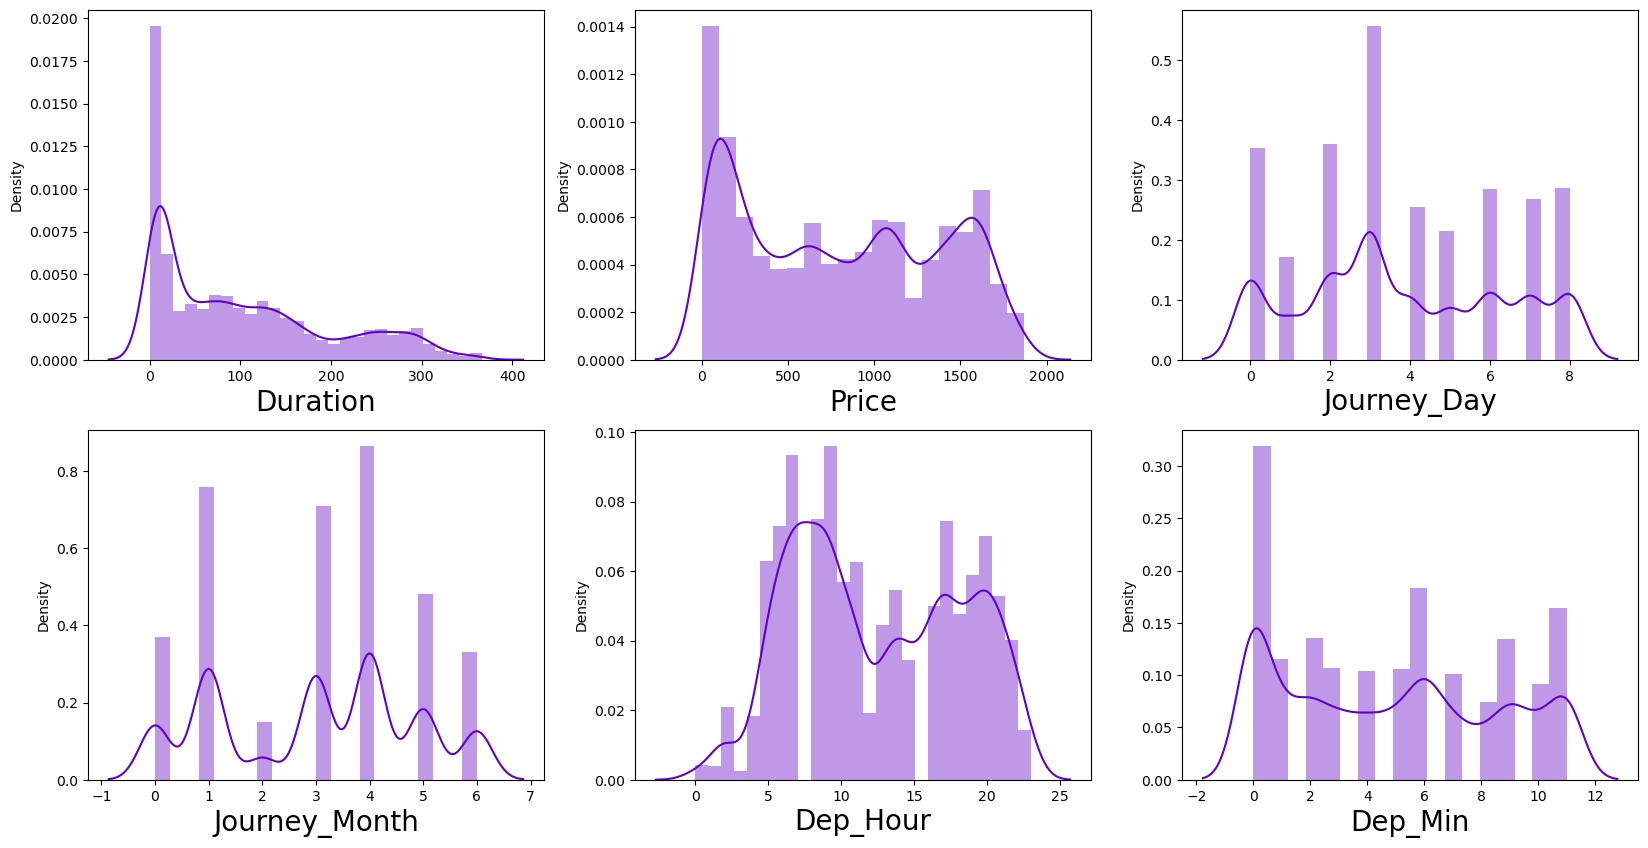

In [36]:
plt.figure(figsize=(20,10),facecolor='white')
sns.set_palette('gnuplot')
plotnum=1
for col in Numerical:
    if plotnum<=6:
        plt.subplot(2,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [37]:
df.skew()

Airline          0.723630
Source          -0.420077
Destination      0.834207
Route           -0.482493
Duration         0.825095
Total_Stops      0.617825
Price            0.142659
Journey_Day      0.144112
Journey_Month   -0.132978
Dep_Hour         0.108580
Dep_Min          0.170922
Arrival_Hour    -0.379022
Arrival_Min      0.110459
dtype: float64

In [38]:
df['Duration'] = np.log1p(df['Duration'])

In [39]:
df['Duration'].skew()

-0.40467156271655824

In [40]:
df.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.012048,0.068618,0.029681,-0.117834,0.034396,-0.038977,0.038653,-0.001935,-0.032280,-0.062383,-0.005157,-0.072935
Source,-0.012048,1.000000,-0.432494,0.403587,0.100249,-0.222515,0.083253,0.054171,0.080206,0.060771,-0.056734,0.027701,0.021073
Destination,0.068618,-0.432494,1.000000,-0.229323,-0.534532,0.509205,-0.330684,-0.037453,-0.076332,-0.089346,0.096899,-0.061327,0.007413
Route,0.029681,0.403587,-0.229323,1.000000,0.360701,-0.435871,0.232151,0.144957,0.076476,-0.074781,-0.071013,0.021043,-0.174527
Duration,-0.117834,0.100249,-0.534532,0.360701,1.000000,-0.849432,0.715559,-0.037756,0.076439,-0.023164,-0.039253,0.078253,-0.137144
Total_Stops,0.034396,-0.222515,0.509205,-0.435871,-0.849432,1.000000,-0.655606,0.031939,-0.060800,0.039929,0.049358,-0.098865,0.177065
Price,-0.038977,0.083253,-0.330684,0.232151,0.715559,-0.655606,1.000000,-0.170415,0.064063,0.008646,-0.047263,0.051755,-0.107786
Journey_Day,0.038653,0.054171,-0.037453,0.144957,-0.037756,0.031939,-0.170415,1.000000,-0.146602,0.002626,-0.027488,0.000131,-0.037386
Journey_Month,-0.001935,0.080206,-0.076332,0.076476,0.076439,-0.060800,0.064063,-0.146602,1.000000,0.028466,-0.009910,-0.004147,-0.038324
Dep_Hour,-0.032280,0.060771,-0.089346,-0.074781,-0.023164,0.039929,0.008646,0.002626,0.028466,1.000000,-0.015032,-0.003222,0.073340


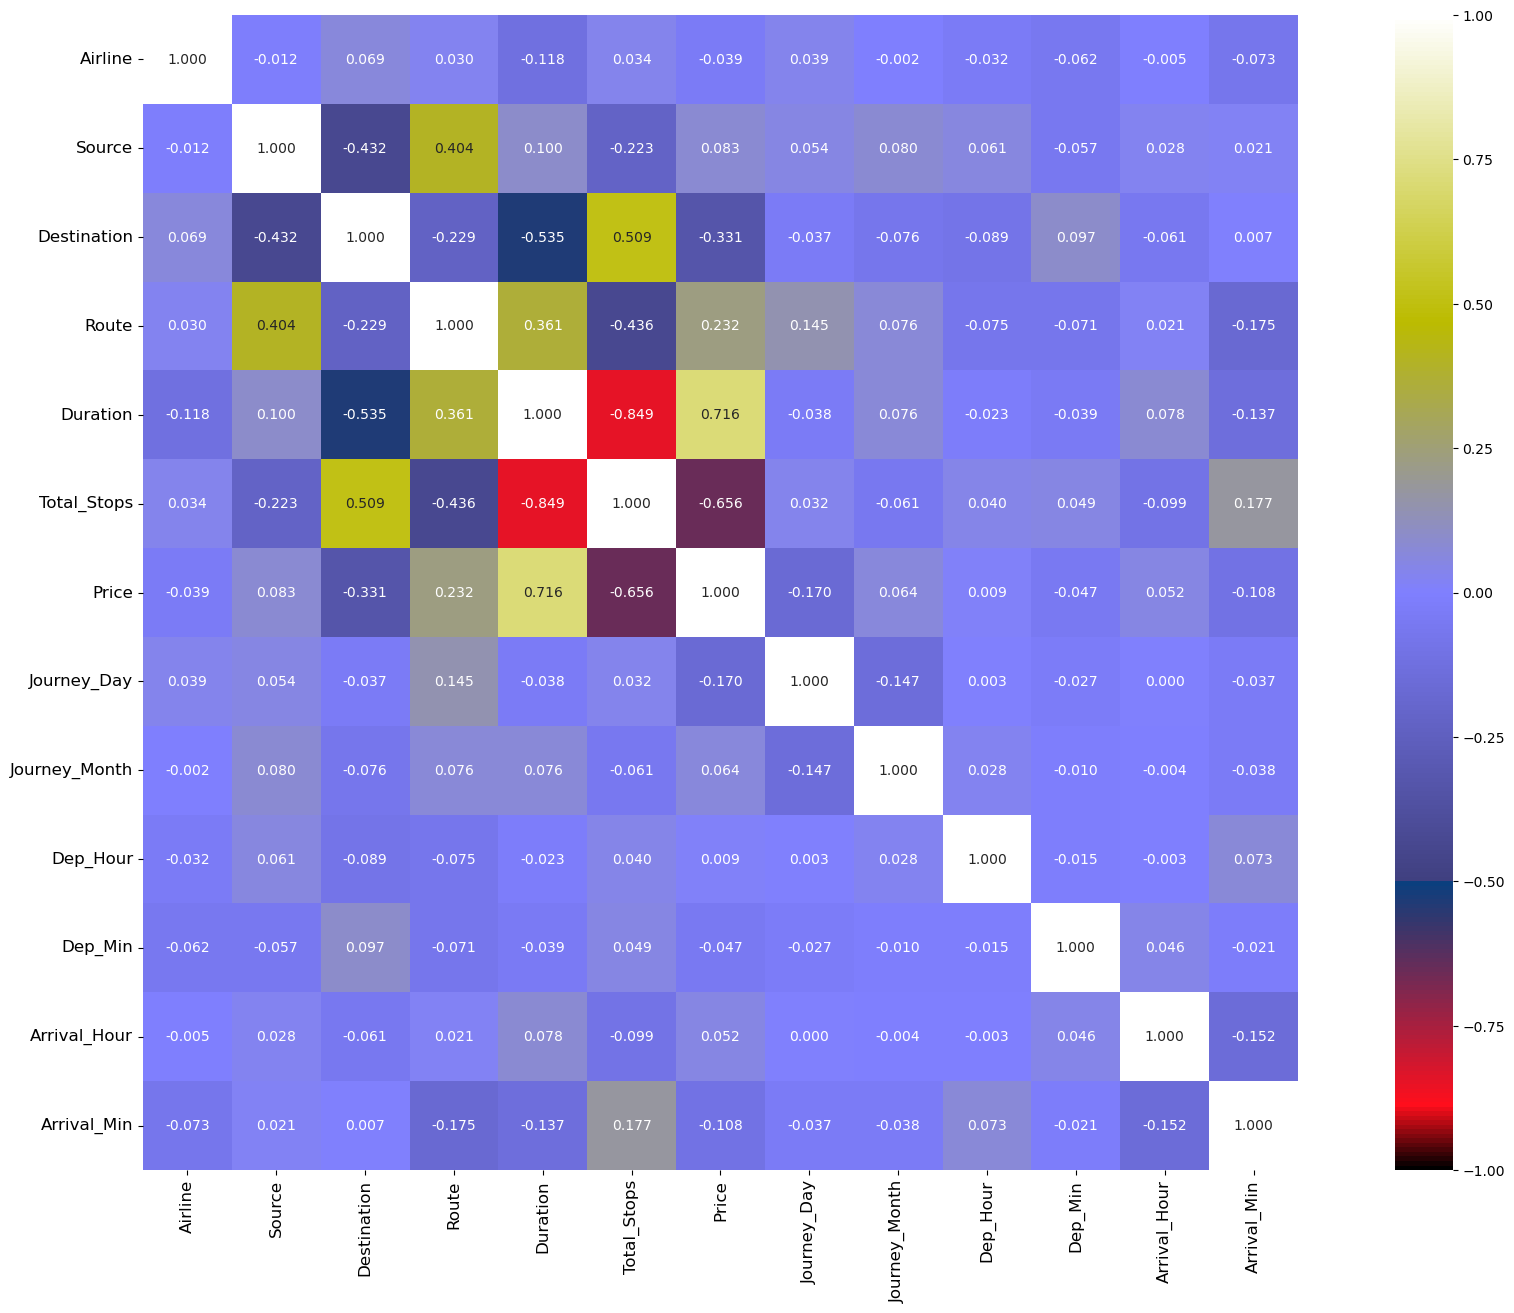

In [41]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

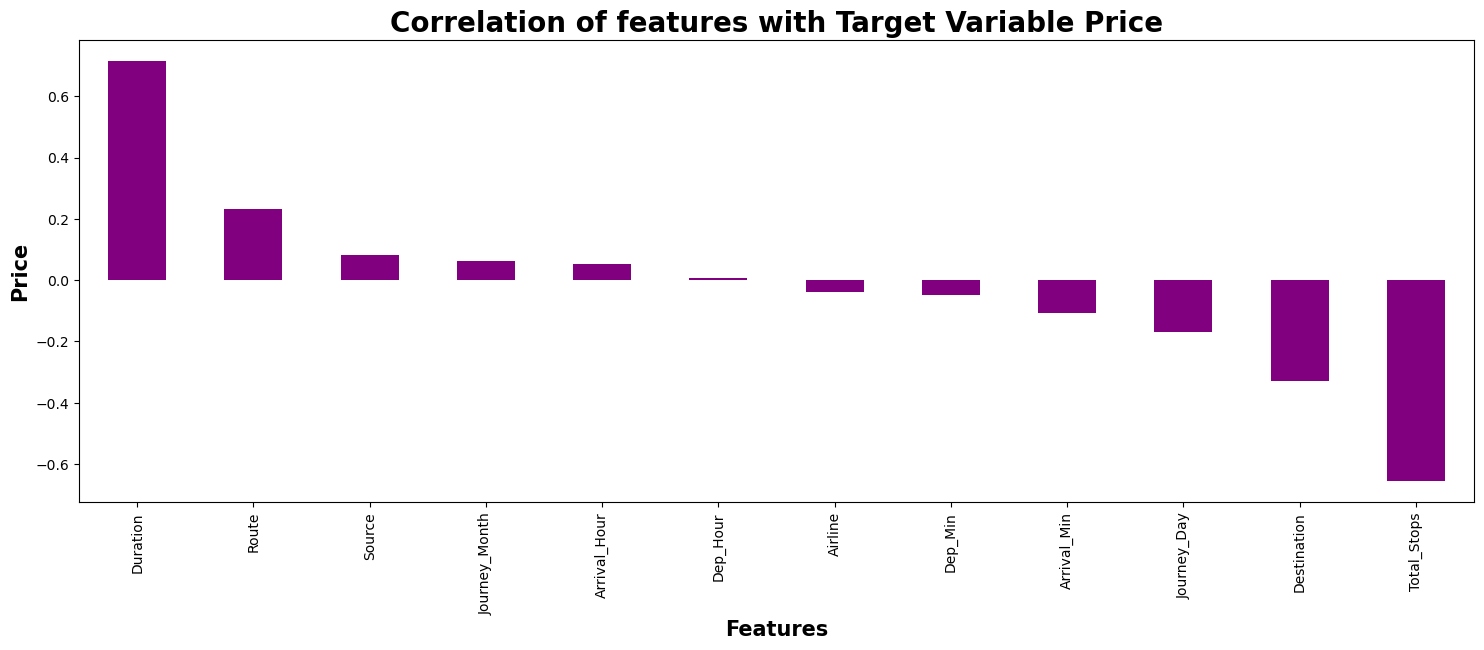

In [42]:
plt.figure(figsize = (18,6))
df.corr()['Price'].drop(['Price']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Price',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Price',fontsize = 20,fontweight='bold')
plt.show()

In [43]:
# Splitting data in target and dependent feature
X = df.drop(['Price'], axis =1)
Y = df['Price']

In [44]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.046076,Airline
1,1.593483,Source
2,1.848596,Destination
3,1.542867,Route
4,4.290641,Duration
5,4.117880,Total_Stops
6,1.068903,Journey_Day
7,1.042178,Journey_Month
8,1.029078,Dep_Hour
9,1.021081,Dep_Min


# Machine Learning Model Building

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (7008, 12)
Training target vector size: (7008,)
Test feature matrix size: (3453, 12)
Test target vector size: (3453,)


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.5737679167652056 on Random_state 139


## Linear Regression Base Model

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=214, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [1226.62551064 1119.30378157  253.07852507 ... 1109.89718332  296.49628898
  211.91940495]


Actual Wins:
 3756    1125
216      969
7966     268
8341     224
9517    1387
        ... 
1605     954
5568     604
4782     942
2939     265
244      168
Name: Price, Length: 3453, dtype: int64


In [54]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.5495352906133703
